# Data Science Regression Project: Predicting Home Prices in Bengaluru

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
hdata=pd.read_csv("Bengaluru_House_Data.csv")
hdata

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
hdata.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
hdata['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
hdata['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
hdata['society'].value_counts()#drop later

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [7]:
hdata['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

# Data Cleaning: Handle NA values

In [8]:
hdata.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
hdata.shape

(13320, 9)

In [10]:
hdata['balcony'].median()

2.0

In [11]:
hdata['balcony']=hdata['balcony'].fillna(hdata.balcony.median())
hdata.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

In [12]:
hdata1=hdata.drop(['society','availability'],axis=1)
hdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     13320 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [13]:
hdata1=hdata1.dropna()
hdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     13246 non-null  float64
 6   price       13246 non-null  float64
dtypes: float64(3), object(4)
memory usage: 827.9+ KB


In [14]:
hdata1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
hdata1['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [16]:
hdata1['bhk']=hdata1['size'].apply(lambda x: int(x.split(' ')[0]))
hdata1.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
hdata1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Explore total_sqft feature

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
float(2+3)

5.0

In [22]:
hdata1[~hdata1['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [23]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [24]:
hdata2 = hdata1.copy()
hdata2.total_sqft = hdata2.total_sqft.apply(convert_sqft_to_num)#apply function
hdata2 = hdata2[hdata2.total_sqft.notnull()]#consider only non null values
hdata2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [24]:
print(hdata2.iloc[30])
hdata1.iloc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object


area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft             2100 - 2850
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [25]:
hdata2.dtypes

area_type      object
location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

Add new feature called price per square feet

In [26]:
hdata3 = hdata2.copy()
hdata3['price_per_sqft'] = hdata3['price']*100000/hdata3['total_sqft']
hdata3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [27]:
hdata3.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,1.602348,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,0.804268,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,2.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


Examine locations

In [28]:
hdata3['location'].value_counts()

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [29]:
hdata3.location = hdata3.location.apply(lambda x: x.strip())
location_stats = hdata3['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [30]:
len(location_stats[location_stats>10])

240

In [31]:
len(location_stats[location_stats<=10])

1047

Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do encoding, it will help us with having fewer dummy columns

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [33]:
len(hdata3.location.unique())

1287

In [34]:
hdata3.location = hdata3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(hdata3.location.unique())

241

In [35]:
hdata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   location        13200 non-null  object 
 2   size            13200 non-null  object 
 3   total_sqft      13200 non-null  float64
 4   bath            13200 non-null  float64
 5   balcony         13200 non-null  float64
 6   price           13200 non-null  float64
 7   bhk             13200 non-null  int64  
 8   price_per_sqft  13200 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


In [36]:
hdata3['area_type'].value_counts()

Super built-up  Area    8729
Built-up  Area          2394
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='price'>

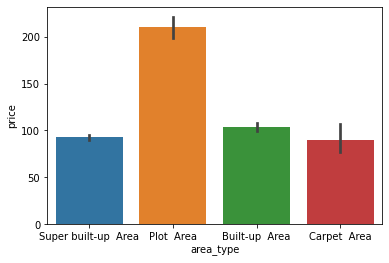

In [37]:
sns.barplot(x='area_type',y='price',data=hdata3)

Outlier Removal Using Bathrooms Feature

In [36]:
hdata3.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [37]:
hdata3.bath.value_counts()

2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

Text(0, 0.5, 'Count')

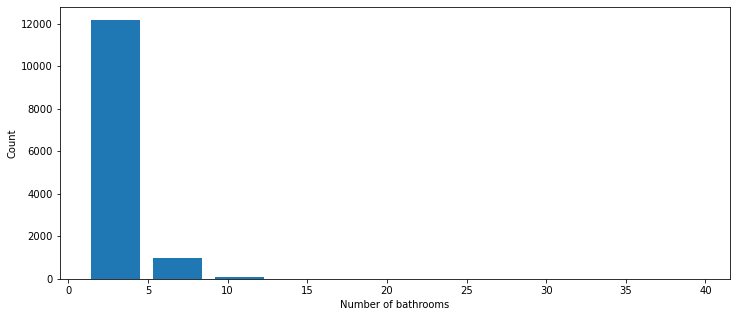

In [40]:
plt.figure(figsize=(12,5))
plt.hist(hdata3.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [38]:
hdata3[hdata3.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
938,Plot Area,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,2.0,290.0,9,23015.873016
1078,Plot Area,other,9 Bedroom,3300.0,14.0,2.0,500.0,9,15151.515152
1718,Super built-up Area,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
1768,Plot Area,other,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
1953,Plot Area,KR Puram,8 Bedroom,1200.0,12.0,2.0,110.0,8,9166.666667
1979,Plot Area,other,8 Bedroom,990.0,12.0,0.0,120.0,8,12121.212121
3096,Super built-up Area,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
3379,Super built-up Area,other,19 BHK,2000.0,16.0,2.0,490.0,19,24500.000000
3609,Super built-up Area,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
4684,Plot Area,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0,43,27500.000000


It is unusual to have many more bathrooms than number of bedrooms in a home

In [39]:
hdata4=hdata3.copy()
out=hdata4[hdata4.bath>hdata4.bhk+3]
ind=out.index
for i in ind:
    hdata4=hdata4.drop(i)
hdata4.shape


(13193, 9)

In [43]:
hdata3.shape

(13200, 9)

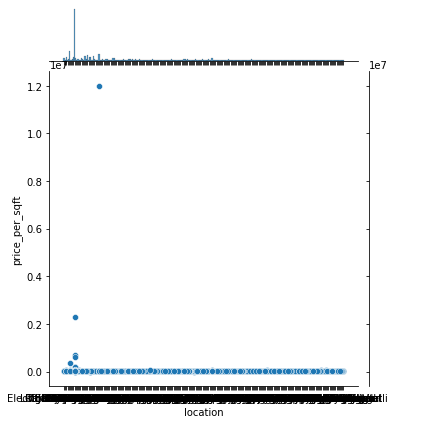

In [40]:
sns.jointplot(x='location',y='price_per_sqft',data=hdata4)

In [45]:
hdata4[hdata4['price_per_sqft']>0.2e7].value_counts()

area_type       location        size       total_sqft  bath  balcony  price  bhk  price_per_sqft
Built-up  Area  other           7 BHK      5.0         7.0   3.0      115.0  7    2300000.0         1
Plot  Area      Sarjapur  Road  4 Bedroom  1.0         4.0   2.0      120.0  4    12000000.0        1
dtype: int64

In [41]:
x=hdata4[hdata4['location']=='Sarjapur  Road']
x[x['bhk']>=4]['price_per_sqft']

300       5582.393988
573      10089.686099
1186      8995.502249
1599      7540.744344
1614      6661.807580
             ...     
12957    10800.000000
13027     5506.257110
13246     8701.957941
13290    11111.111111
13293     8041.237113
Name: price_per_sqft, Length: 61, dtype: float64

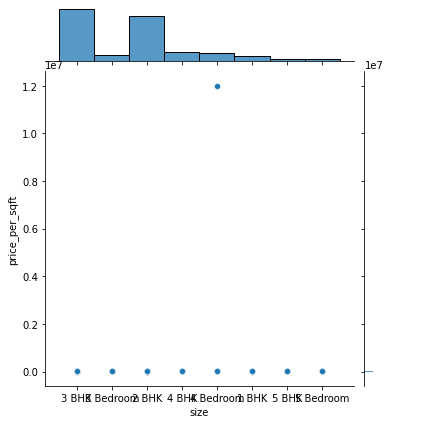

In [47]:
sns.jointplot(x='size',y='price_per_sqft',data=x)

In [48]:
hdata4['price_per_sqft'].describe()

count    1.319300e+04
mean     7.915005e+03
std      1.067545e+05
min      2.678298e+02
25%      4.266667e+03
50%      5.434783e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [42]:
x=hdata4[hdata4['price_per_sqft']>1e+6] 
y=x[x['bhk']<=4]
y
#hdata4.shape

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
4086,Plot Area,Sarjapur Road,4 Bedroom,1.0,4.0,2.0,120.0,4,12000000.0


In [43]:
hdata5=hdata4.copy()
ind=y.index
for i in ind:
    hdata5=hdata5.drop(i)
hdata5.shape


(13192, 9)

In [51]:
hdata5

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [44]:
hdata5 = hdata5.drop(['size','price_per_sqft'],axis='columns')
hdata5.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3


# Encoding

In [45]:
# Defining the function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function
hdata6 = hdata5.copy()
#hdata6=dummies('area_type',hdata6)
hdata6=dummies('location',hdata6)

In [46]:
hdata6.drop('area_type',inplace=True,axis=1)
hdata6.columns

Index(['total_sqft', 'bath', 'balcony', 'price', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [47]:
hdata6.head()

,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [74]:
hdata6.shape

(13192, 245)

In [48]:
X = hdata6.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = hdata6.price
y.head(3)

0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.4567021349793724

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.6307755622236568

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

cross_val_score(rf, X, y, cv=cv)

array([0.67746506, 0.51655676, 0.74433104, 0.42390307, 0.61774162])

In [85]:
cross_val_score(lr, X, y, cv=cv)

array([ 0.51069433,  0.49210566,  0.59452621, -0.08204848,  0.44719837])

In [88]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'n_estimators': [10,100]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_params','best_score'])

find_best_model_using_gridsearchcv(X,y)

,model,best_params,best_score
0,linear_regression,{'normalize': True},0.392495
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.345255
2,decision_tree,"{'criterion': 'mse', 'splitter': 'random'}",0.517826
3,random_forest,"{'criterion': 'mse', 'n_estimators': 100}",0.630633


In [54]:
X.shape

(13192, 244)

# Predictions

In [56]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return rf.predict([x])[0]


In [55]:
np.where(X.columns=='1st Phase JP Nagar')[0][0]

4

In [57]:
predict_price('1st Phase JP Nagar',1000, 2,2)


56.737

In [58]:
predict_price('Electronic City Phase II',1000, 2, 2)

28.39779975579976

In [60]:
predict_price('Uttarahalli',1000, 4, 3)

127.0

In [97]:
hdata.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
